In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from copy import deepcopy

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
os.listdir('/content/gdrive/My Drive/vc_modeling')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


['data']

In [ ]:
file_names = os.listdir("/content/gdrive/My Drive/vc_modeling/data/crunchbase_bulk_export/")
print(file_names)

['category_groups.csv', 'funding_rounds.csv', 'people.csv', 'checksum.csv', 'people_descriptions.csv', 'investors.csv', 'organization_descriptions.csv', 'investment_partners.csv', 'event_appearances.csv', 'organizations.csv', 'org_parents.csv', 'jobs.csv', 'acquisitions.csv', 'funds.csv', 'ipos.csv', 'degrees.csv', 'investments.csv', 'events.csv']


In [ ]:
df_names = [x[:-4] for x in file_names]
print(df_names)

['category_groups', 'funding_rounds', 'people', 'checksum', 'people_descriptions', 'investors', 'organization_descriptions', 'investment_partners', 'event_appearances', 'organizations', 'org_parents', 'jobs', 'acquisitions', 'funds', 'ipos', 'degrees', 'investments', 'events']


In [ ]:
dfs = [pd.read_csv("/content/gdrive/My Drive/vc_modeling/data/crunchbase_bulk_export/"+x) for x in file_names]
df_dict = dict(zip(df_names, dfs))
print(df_dict.keys())

dict_keys(['category_groups', 'funding_rounds', 'people', 'checksum', 'people_descriptions', 'investors', 'organization_descriptions', 'investment_partners', 'event_appearances', 'organizations', 'org_parents', 'jobs', 'acquisitions', 'funds', 'ipos', 'degrees', 'investments', 'events'])


,uuid,has_succeeded
0,e1393508-30ea-8a36-3f96-dd3226033abd,1
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,1
9,4111dc8b-c0df-2d24-ed33-30cd137b3098,1
10,180ebf67-68d0-2316-e93d-8e1e546330ba,1
16,ea091a8c-40e0-0607-e05a-86e734f94ade,1


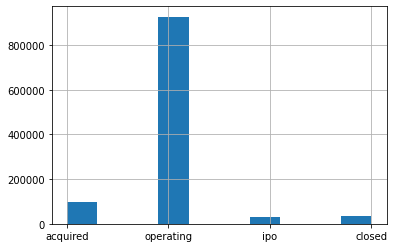

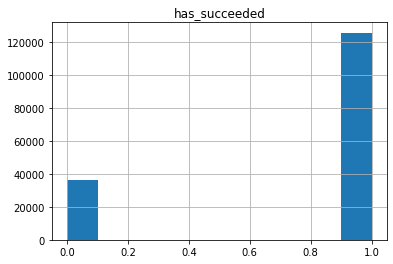

In [ ]:
org = df_dict["organizations"]
org["status"].hist()

org_acq = org[org["status"] == "acquired"][["uuid"]]
org_acq["has_succeeded"] = 1
org_ipo = org[org["status"] == "ipo"][["uuid"]]
org_ipo["has_succeeded"] = 1
org_closed = org[org["status"] == "closed"][["uuid"]]
org_closed["has_succeeded"] = 0

org_all_status = pd.concat([org_acq, org_ipo, org_closed])

org_all_status = org_all_status.drop_duplicates(subset=["uuid"])

org_all_status.hist()
org_all_status.head()

In [ ]:
from google.colab import files

# export features to csv
org_all_status.to_csv('organization_success.csv', columns = ["uuid", "has_succeeded"], index=False) 
files.download('organization_success.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>